In [1]:
import os,sys
# Set up the path to SModelS installation folder
import sys; sys.path.append("."); import smodels_paths
import numpy as np
import matplotlib.pyplot as plt

from smodels.tools.modelTester import getCombiner

### Define input (SLHA) file and the parameters file

In [2]:
slhafile = os.path.expanduser("./inputFiles/slha/ewino_example.slha")
# Define parameters file with combineAnas = ATLAS-SUSY-2019-08,ATLAS-SUSY-2019-09:
parfile = os.path.expanduser("./parameters_comb.ini")

### Define some basic parameters for plotting the likelihoods

In [3]:
expected = False # whether to plot the observed or expected likelihood
normalize = True # whether to normalize the likelihoods
muvals = np.linspace(0.,2.,100) # Signal strength values for which to evaluate the likelihoods

### Run SModelS and get the analysis combination

In [4]:
combiner = getCombiner(slhafile, parfile)

WARNING in databaseObj.fetchFromScratch() in 669: downloading the database from https://smodels.github.io/database/official221 and caching in /home/lessa/.cache/smodels. If you want the pickled database file to be cached in a different location, set the environment variable SMODELS_CACHEDIR, e.g. to '/tmp'.


loading >...................................................done.


### Use the combination to evaluate the likelihoods

In [5]:
llhdDict = combiner.getLlhds(muvals,expected,normalize)

### Compute L_SM, L_BSM and L_max

In [6]:
muhat = combiner.muhat()
lmax = combiner.lmax()
lsm = combiner.lsm()
lbsm = combiner.likelihood(mu=1.0)

### Plot the results

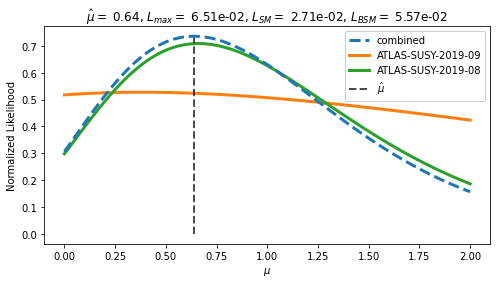

In [9]:
fig = plt.figure(figsize=(8,4))
ymin = 0.
ymax = 0.
for anaID,l in llhdDict.items():
    if anaID == 'combined':
        zorder = 100
        linestyle = '--'
    else:
        zorder = None
        linestyle = '-'
        
    plt.plot(muvals,l,label=anaID,linewidth=3,zorder=zorder,linestyle=linestyle)
    ymin = min(ymin,min(l))
    ymax = max(ymax,max(l))
plt.vlines(muhat,ymin=ymin,ymax=ymax,linestyle='--',linewidth=2,
           label=r'$\hat{\mu}$',color='black',alpha=0.7)


# plt.yscale('log')
# plt.ylim(1e-1,1e1)
plt.xlabel(r'$\mu$')
if normalize:
    plt.ylabel('Normalized Likelihood')
else:
    plt.ylabel('Likelihood')
plt.legend(framealpha=1)
plt.title(r'$\hat{\mu} = $ %1.2f, $L_{max} =$ %1.2e, $L_{SM} =$ %1.2e, $L_{BSM} =$ %1.2e' %(muhat,lmax,lsm,lbsm))
plt.show()